In [49]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
warnings.filterwarnings('ignore')
df=pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [50]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 0, 'Survived')

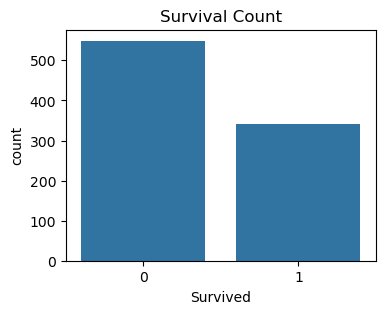

In [51]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived')

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

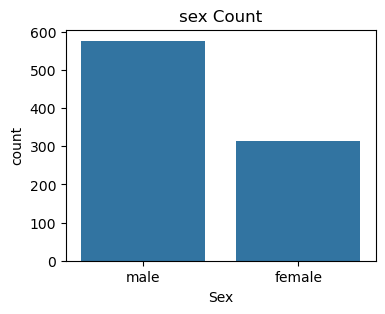

In [52]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Sex', data=df)
plt.title('sex Count')
plt.xlabel

Text(0.5, 1.0, 'Survival Count by sex')

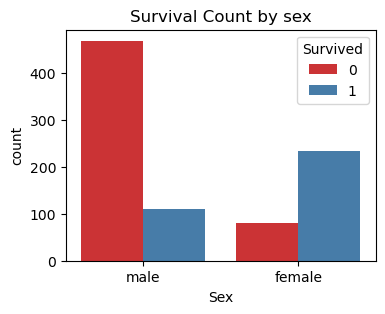

In [53]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count by sex')

In [54]:
df[df['Survived'] == 1]["Sex"].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Count by sex')

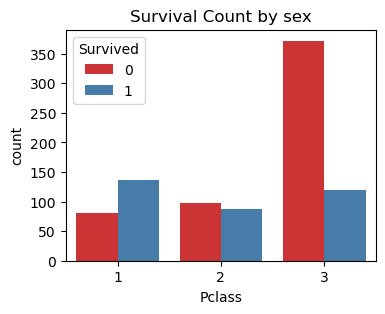

In [55]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count by sex')

In [56]:
df[df['Survived']==1]['Pclass'].value_counts()

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

Text(0.5, 0, 'Age')

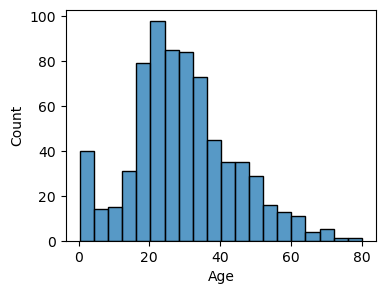

In [57]:
plt.figure(figsize=(4, 3))
sns.histplot(x='Age',data=df)
plt.xlabel('Age')

Text(0.5, 1.0, 'Average Age of Survived vs Not Survived')

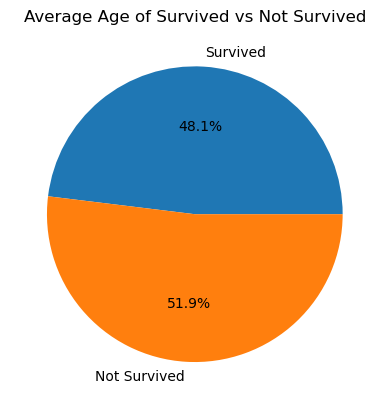

In [58]:
avg_age_survived=df[df['Survived']==1]['Age'].mean()
avg_age_non_survived=df[df['Survived']==0]['Age'].mean()
plt.pie([avg_age_survived, avg_age_non_survived],
        labels=['Survived', 'Not Survived'],autopct='%1.1f%%')
plt.title('Average Age of Survived vs Not Survived')

In [59]:
avg_age_survived

np.float64(28.343689655172415)

In [60]:
avg_age_non_survived

np.float64(30.62617924528302)

Text(0.5, 1.0, 'Survival Count by SibSp')

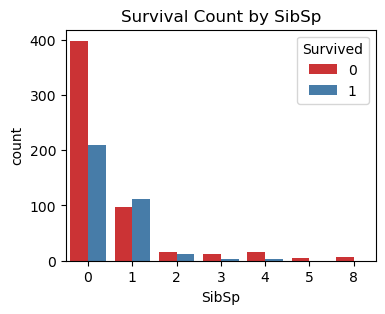

In [61]:
plt.figure(figsize=(4, 3))
sns.countplot(x='SibSp', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count by SibSp')

Text(0.5, 1.0, 'Survival Count by SibSp')

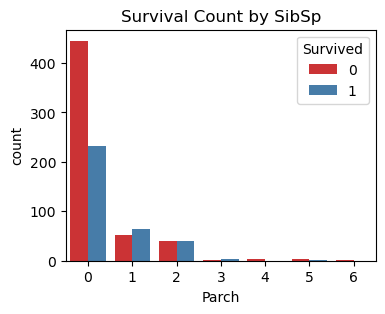

In [62]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Parch', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count by SibSp')

In [63]:
df[df['Survived']==1]['SibSp'].value_counts()

SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64

In [64]:
df[df['Survived']==1]['Parch'].value_counts()

Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64

In [65]:
df[df['Survived']==1]['Fare'].value_counts()

Fare
13.0000    16
26.0000    15
7.7500     12
10.5000     9
26.5500     8
           ..
29.7000     1
39.4000     1
9.3500      1
13.8583     1
24.0000     1
Name: count, Length: 153, dtype: int64

In [66]:
avg_fare_survived=df['Fare'].mean()
avg_fare_survived

np.float64(32.204207968574636)

In [67]:
f=df[df['Fare']>avg_fare_survived]

In [68]:
f['Survived'].value_counts()

Survived
1    126
0     85
Name: count, dtype: int64

grouped_age
not adult    0.590361
adult        0.366412
senior       0.227273
Name: Survived, dtype: float64


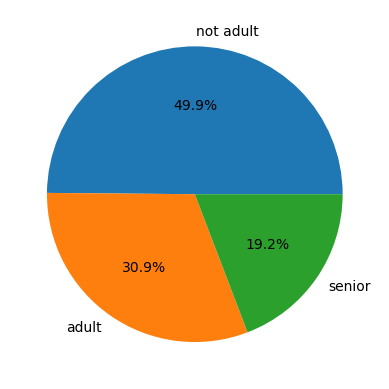

In [69]:
def cat_age(age):
    if age < 16:
        return "not adult"
    elif age > 60:
        return "senior"
    else:
        return "adult"

df['grouped_age'] = df['Age'].apply(cat_age)
k = df.groupby('grouped_age')['Survived'].mean().sort_values(ascending=False)
print(k)
plt.pie(k.values,labels=k.index,autopct="%1.1f%%")
plt.show()

In [70]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,grouped_age
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,adult
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,adult
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,adult
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,adult
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,adult
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adult
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,adult


In [71]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,grouped_age
0,0,3,male,22.0,1,0,7.2500,NaN,S,adult
1,1,1,female,38.0,1,0,71.2833,C85,C,adult
2,1,3,female,26.0,0,0,7.9250,NaN,S,adult
3,1,1,female,35.0,1,0,53.1000,C123,S,adult
4,0,3,male,35.0,0,0,8.0500,NaN,S,adult
5,0,3,male,NaN,0,0,8.4583,NaN,Q,adult
6,0,1,male,54.0,0,0,51.8625,E46,S,adult
7,0,3,male,2.0,3,1,21.0750,NaN,S,not adult
8,1,3,female,27.0,0,2,11.1333,NaN,S,adult
9,1,2,female,14.0,1,0,30.0708,NaN,C,not adult


In [72]:
df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
grouped_age      0
dtype: int64

In [73]:
ratio=df.isnull().sum()/df.shape[0]*100
pd.DataFrame(ratio).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,grouped_age
0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467,0.0


In [74]:
df.duplicated().sum()

np.int64(107)

In [75]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [76]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,784.000000,784.000000,678.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.869351,0.522959,0.415816,34.711740
std,0.492507,0.855056,14.759076,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.250000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     784 non-null    int64  
 1   Pclass       784 non-null    int64  
 2   Sex          784 non-null    object 
 3   Age          678 non-null    float64
 4   SibSp        784 non-null    int64  
 5   Parch        784 non-null    int64  
 6   Fare         784 non-null    float64
 7   Cabin        203 non-null    object 
 8   Embarked     782 non-null    object 
 9   grouped_age  784 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 67.4+ KB


In [78]:
df.nunique()

Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Cabin          147
Embarked         3
grouped_age      3
dtype: int64

In [79]:
dtypes=df.dtypes
n_uniq=df.nunique()
pd.DataFrame({"dtypes":dtypes,"n_uniq":n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,grouped_age
dtypes,int64,int64,object,float64,int64,int64,float64,object,object,object
n_uniq,2,3,2,88,7,7,248,147,3,3


In [80]:
cols=["Pclass","SibSp","Parch","Sex","Embarked","Survived"]
df[cols]=df[cols].astype("category")
pd.DataFrame(df.dtypes).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,grouped_age
0,category,category,category,float64,category,category,float64,object,category,object


In [81]:
df=df.drop(["Cabin"],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,grouped_age
0,0,3,male,22.0,1,0,7.2500,S,adult
1,1,1,female,38.0,1,0,71.2833,C,adult
2,1,3,female,26.0,0,0,7.9250,S,adult
3,1,1,female,35.0,1,0,53.1000,S,adult
4,0,3,male,35.0,0,0,8.0500,S,adult


In [82]:
df.dropna(subset=["Embarked"],inplace=True)
df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            106
SibSp            0
Parch            0
Fare             0
Embarked         0
grouped_age      0
dtype: int64

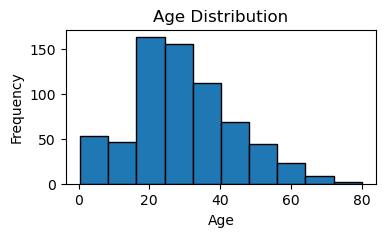

In [83]:
plt.figure(figsize=(4, 2))
plt.hist(df['Age'],edgecolor="black" )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [84]:

median_age = df['Age'].median()
print(f"The median age is: {median_age}")

The median age is: 28.0


In [85]:
df["Age"] = df["Age"].fillna(median_age)
pd.DataFrame(df.isnull().sum()).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,grouped_age
0,0,0,0,0,0,0,0,0,0


In [86]:
numeric_cols=df.select_dtypes(include=np.number)
correlation_matrix=numeric_cols.corr()

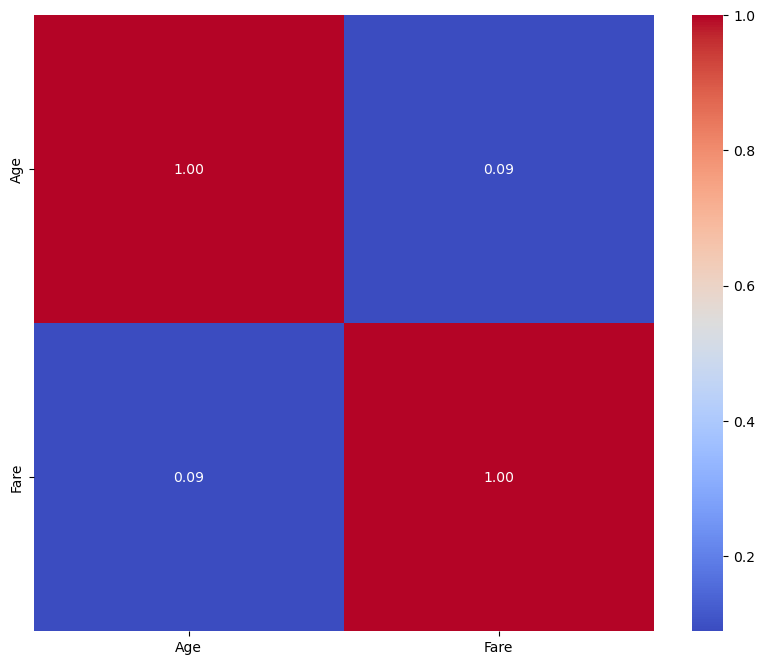

In [87]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [88]:
 X=df.drop("Survived",axis=1)
 Y=df[["Survived"]]

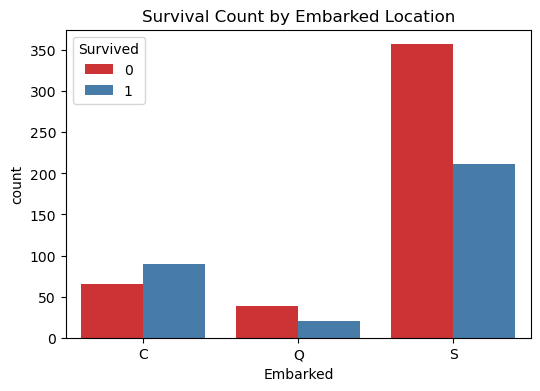


Survival Rate by Embarked Location:
Survived         0         1
Embarked                    
C         0.419355  0.580645
Q         0.661017  0.338983
S         0.628521  0.371479

The Embarked location with the highest survival rate is C with a rate of 0.5806


In [89]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot survival counts for each Embarked location
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count by Embarked Location')
plt.show()

# Calculate survival rate for each Embarked location
survival_rate = df.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack()
print("\nSurvival Rate by Embarked Location:")
print(survival_rate)

# Determine the Embarked location with the highest survival rate
survival_rate_0 = survival_rate[0]
survival_rate_1 = survival_rate[1]

highest_survival_rate = survival_rate_1.max()
embarked_location = survival_rate_1.idxmax()

print(f"\nThe Embarked location with the highest survival rate is {embarked_location} with a rate of {highest_survival_rate:.4f}")

In [90]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,grouped_age
0,0,3,1,22.0,1,0,7.2500,S,adult
1,1,1,0,38.0,1,0,71.2833,C,adult
2,1,3,0,26.0,0,0,7.9250,S,adult
3,1,1,0,35.0,1,0,53.1000,S,adult
4,0,3,1,35.0,0,0,8.0500,S,adult


In [91]:
df['Embarked'] = df['Embarked'].map({'S': 2, 'C': 0, 'Q': 1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,grouped_age
0,0,3,1,22.0,1,0,7.2500,2,adult
1,1,1,0,38.0,1,0,71.2833,0,adult
2,1,3,0,26.0,0,0,7.9250,2,adult
3,1,1,0,35.0,1,0,53.1000,2,adult
4,0,3,1,35.0,0,0,8.0500,2,adult


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convert 'grouped_age' column to numerical values
label_encoder = LabelEncoder()
df['grouped_age'] = label_encoder.fit_transform(df['grouped_age'])

# Update X with the encoded 'Sex' and 'grouped_age' columns
X = df.drop("Survived", axis=1)
Y = df[["Survived"]]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and print accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.7771


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Convert 'grouped_age' column to numerical values
label_encoder = LabelEncoder()
df['grouped_age'] = label_encoder.fit_transform(df['grouped_age'])

# Update X with the encoded 'Sex' and 'grouped_age' columns
X = df.drop("Survived", axis=1)
Y = df[["Survived"]]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define a range of n_estimators values to test
n_estimators_values = [10, 100, 500]

# Train and evaluate the Random Forest classifier for each n_estimators value
for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest Accuracy with n_estimators={n_estimators}: {accuracy:.4f}")

Random Forest Accuracy with n_estimators=10: 0.7707
Random Forest Accuracy with n_estimators=100: 0.7771
Random Forest Accuracy with n_estimators=500: 0.7834


In [94]:
# Make predictions on the first 10 rows of the training data
first_10_rows = X_train[:10]
predictions = rf.predict(first_10_rows)

# Get the actual survival values for the first 10 rows
actual_values = y_train[:10]['Survived'].values

# Print the predictions and actual values
print("Predictions:", predictions)
print("Actual values:", actual_values)

Predictions: [0 1 1 1 0 0 0 0 1 1]
Actual values: [0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
Categories (2, int64): [0, 1]


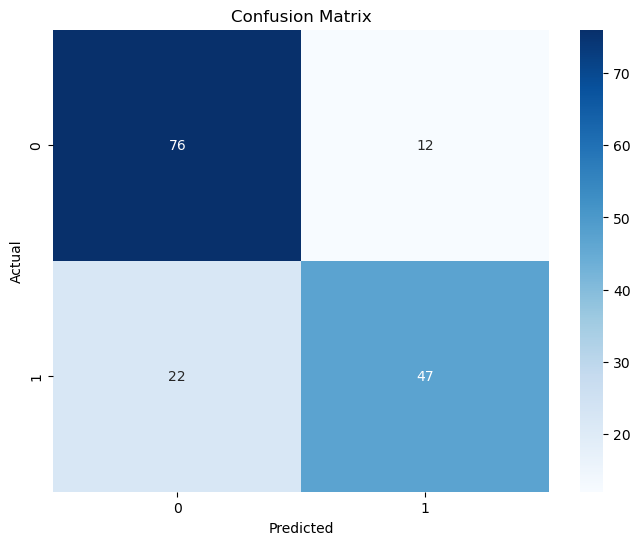

Confusion Matrix:
[[76 12]
 [22 47]]


In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# 15. List the top 3 most important features according to the Random Forest model.
feature_importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print("Top 3 most important features:")
print(importance_df.head(3))

# 16. Use cross_val_score to evaluate model performance. What’s the average accuracy across folds?
scores = cross_val_score(rf, X, Y, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {scores}")
print(f"Average cross-validation accuracy: {scores.mean():.4f}")

# 17. Try changing max_depth of the Random Forest. How does it affect accuracy and overfitting?
rf_depth = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_depth.fit(X_train, y_train)
y_pred_depth = rf_depth.predict(X_test)
accuracy_depth = accuracy_score(y_test, y_pred_depth)
print(f"\nRandom Forest Accuracy with max_depth=5: {accuracy_depth:.4f}")

# 18. Compare Random Forest accuracy with a simple Decision Tree. Which performs better and why?
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy: {accuracy_dt:.4f}")


Top 3 most important features:
  Feature  Importance
5    Fare    0.267985
2     Age    0.256792
1     Sex    0.237587

Cross-validation scores: [0.7133758  0.78343949 0.80769231 0.75       0.79487179]
Average cross-validation accuracy: 0.7699

Random Forest Accuracy with max_depth=5: 0.7834

Decision Tree Accuracy: 0.7261


### The Random Forest generally performs better because it averages the results of multiple decision trees, reducing overfitting.

## Critical Thinking & Interpretation
#### 19. What 3 factors seem to affect survival the most based on your analysis and model?
> Based on the feature importance and earlier analysis:
>Sex, Age, Fare

#### 20. If you were going to improve the model, what extra data (features) would you collect and why?
>More specific location data, family size, and `potentially` *socio-economic* **status**.4

